In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
pd.set_option('display.max_columns', None)

/Users/hardiksharma/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# data available at https://www.kaggle.com/datasets/harshvir04/algerian-forest-fires-dataset
data = pd.read_csv("Data/Algerian_forest_fires_dataset_UPDATE.csv", header=1)

In [3]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


## Step 1 : Know your data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [5]:
data[data.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


## Step 2 : Data Preprocessing

In [6]:
data.loc[:122, "Region"]=0
data.loc[122:, "Region"]=1
df = data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       246 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.0+ KB


In [8]:
df[['Region']]=df[['Region']].astype(int)

In [9]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [10]:
df = df.dropna().reset_index(drop=True)

In [11]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [12]:
df = df.drop(122).reset_index(drop=True)

In [13]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [14]:
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 28.6+ KB


In [16]:
# Change the datatype of columns
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']]=df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)
df[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']]=df[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype(float)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


## Step 3 : Exploratory Data Analysis

In [18]:
df_copy = df.drop(['day','month','year'],axis=1)

In [19]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [20]:
df_copy["Classes"].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [21]:
df_copy["Classes"] = np.where(df_copy['Classes'].str.contains('not fire'),0,1)

In [22]:
df_copy["Classes"].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

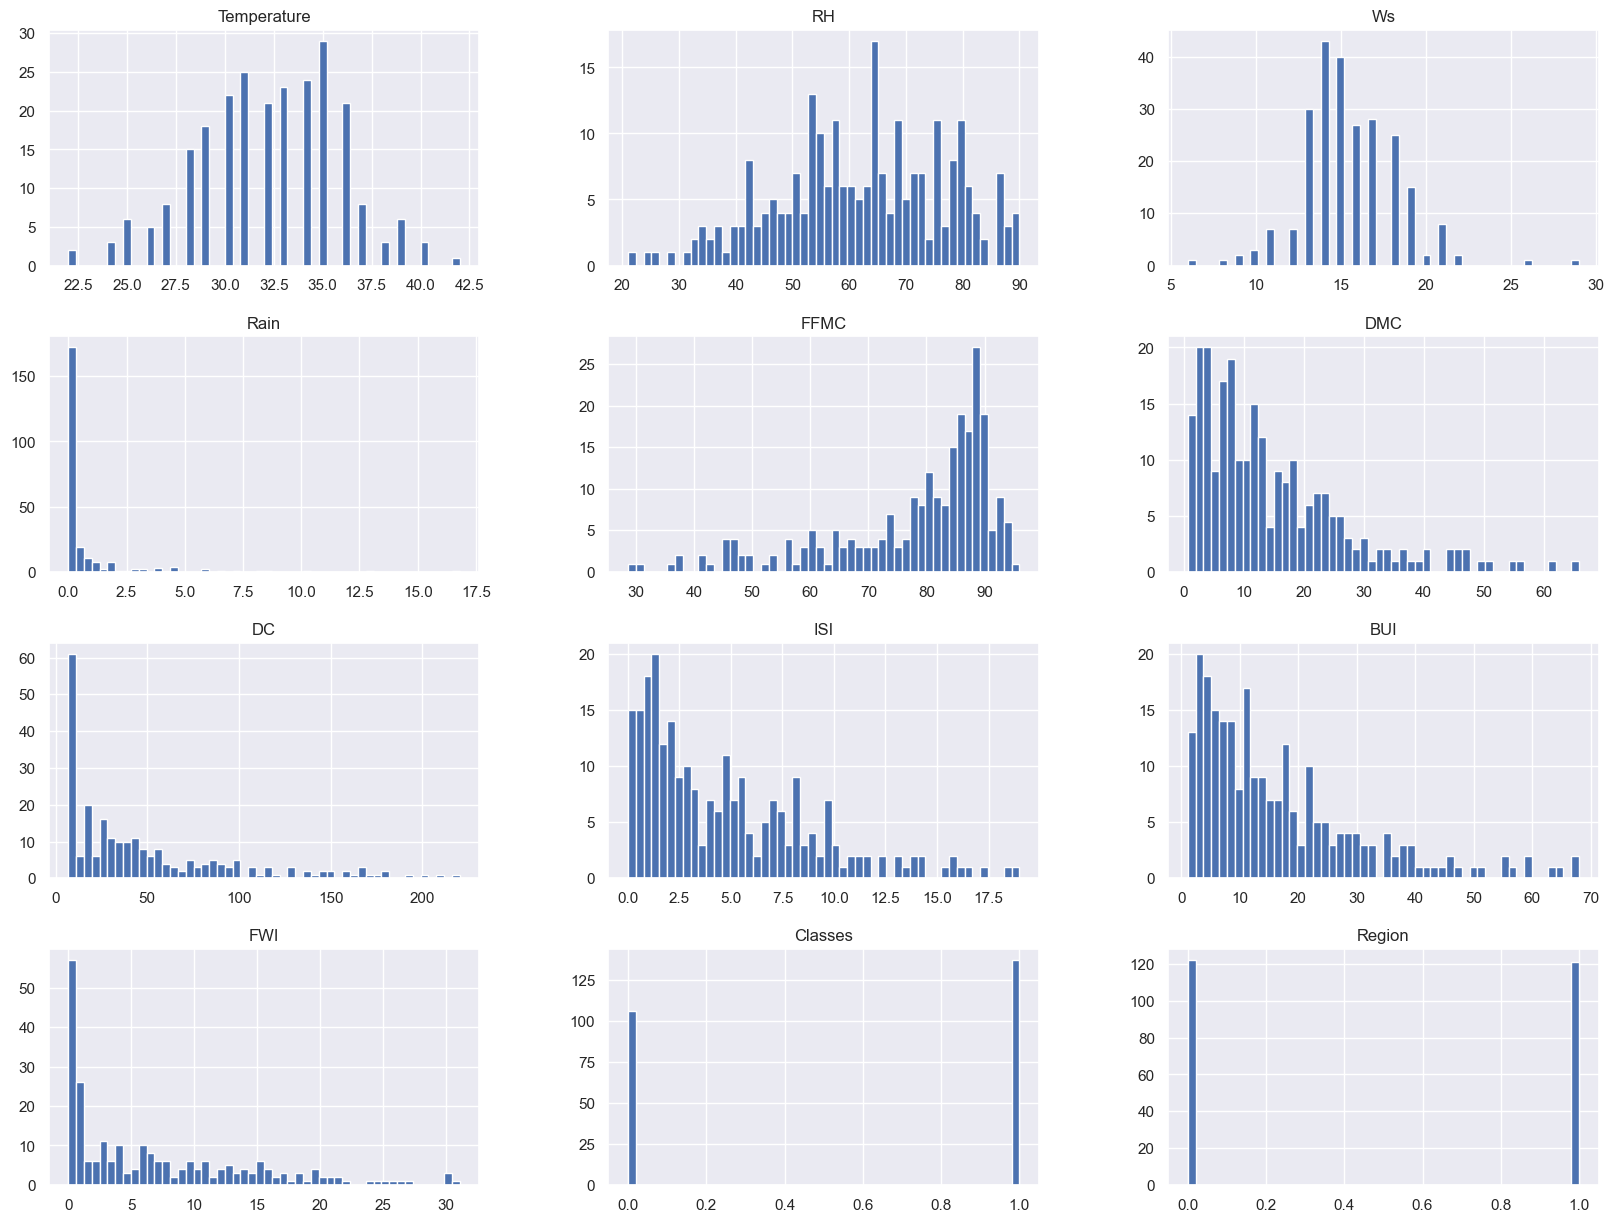

In [23]:
## Plot histograms for all the above features
df_copy.hist(bins=50, figsize=(20,15))
plt.show()

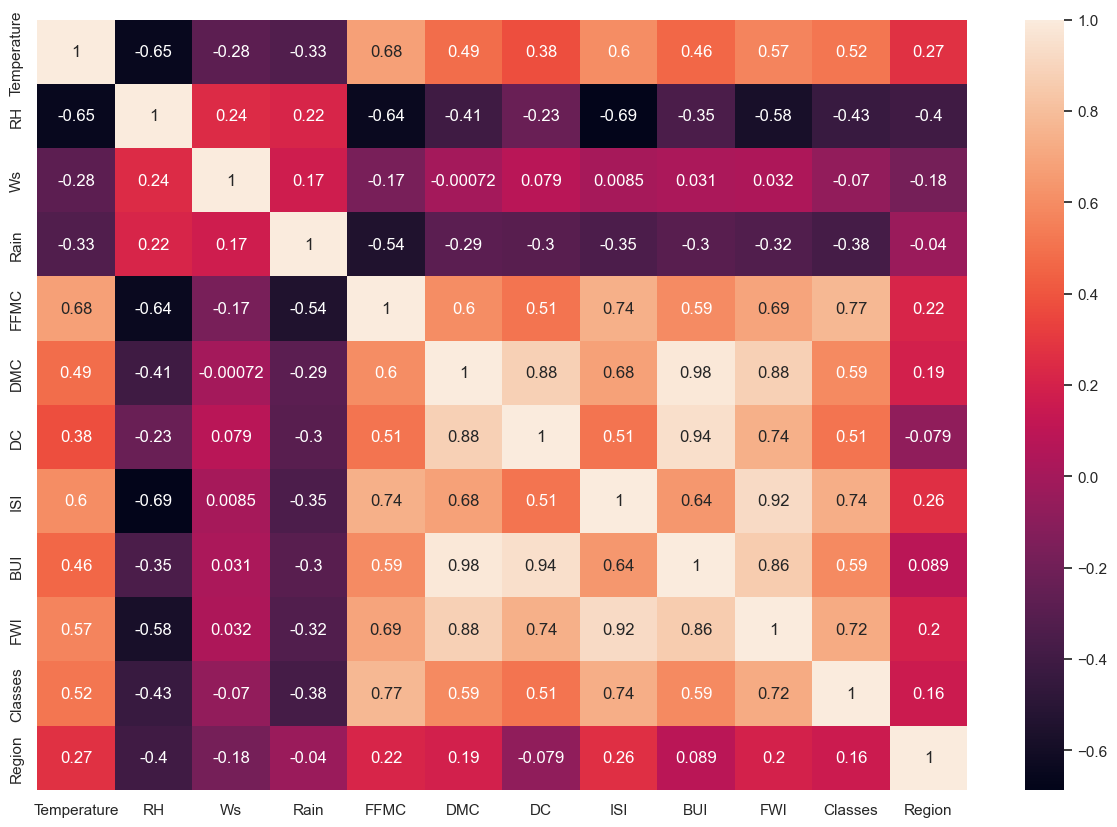

In [24]:
plt.figure(figsize=(15, 10))  # Set the figure size
sns.heatmap(df_copy.corr(), annot=True)
plt.show()

###  I have performed the basic EDA to see the distribution of each feature and to see the correlation. You can perform more EDA depending upon the dataset you posses.

## Step 4 : Divide the data into dependent and independent feature

In [25]:
X = df_copy.drop('FWI', axis=1)
y = df['FWI']

## Step 5 : Divide the data into training and testing

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(182, 11)
(61, 11)
(182,)
(61,)


## Step 6 : Handling Multicolinearity (if present) - can be also used as feature engineering

In [27]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.628502,-0.249318,-0.328555,0.669625,0.493285,0.402700,0.608315,0.470789,0.511950,0.196275
RH,-0.628502,1.000000,0.266236,0.213511,-0.651797,-0.430446,-0.251660,-0.677047,-0.373832,-0.408252,-0.380253
Ws,-0.249318,0.266236,1.000000,0.155020,-0.186983,-0.022285,0.038982,-0.006760,0.004627,-0.074026,-0.152157
Rain,-0.328555,0.213511,0.155020,1.000000,-0.528762,-0.292783,-0.304003,-0.344911,-0.303776,-0.377304,-0.019583
FFMC,0.669625,-0.651797,-0.186983,-0.528762,1.000000,0.621822,0.530801,0.733178,0.611061,0.766095,0.168993
DMC,0.493285,-0.430446,-0.022285,-0.292783,0.621822,1.000000,0.884620,0.699292,0.981764,0.594780,0.144090
DC,0.402700,-0.251660,0.038982,-0.304003,0.530801,0.884620,1.000000,0.530494,0.945570,0.538352,-0.095265
ISI,0.608315,-0.677047,-0.006760,-0.344911,0.733178,0.699292,0.530494,1.000000,0.662201,0.733035,0.216529
BUI,0.470789,-0.373832,0.004627,-0.303776,0.611061,0.981764,0.945570,0.662201,1.000000,0.602558,0.045370
Classes,0.511950,-0.408252,-0.074026,-0.377304,0.766095,0.594780,0.538352,0.733035,0.602558,1.000000,0.093244


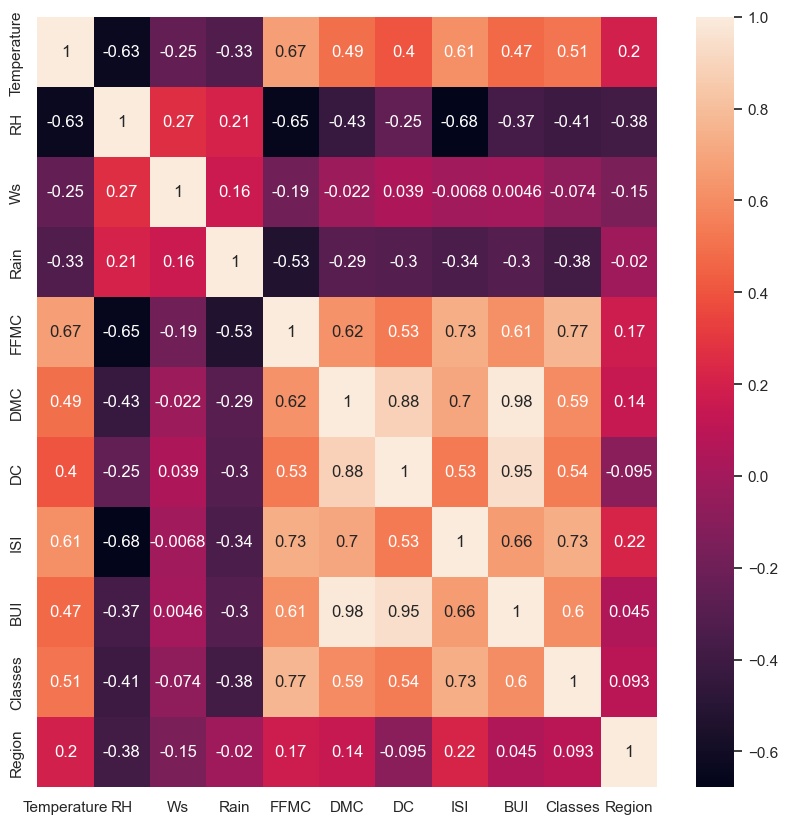

In [28]:
plt.figure(figsize=(10, 10))  # Set the figure size
sns.heatmap(X_train.corr(), annot=True)
plt.show()

In [29]:
# Function to get highly correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [30]:
corr_features = correlation(X_train, 0.85)
print(corr_features)

{'BUI', 'DC'}


In [31]:
# Drop any one column from the above set of correlated features. You can refer to the domain expert to find the one that should be dropped.
X_train.drop('BUI', axis=1, inplace=True) 
X_test.drop('BUI', axis=1, inplace=True)
X_train.shape, X_test.shape

((182, 10), (61, 10))

In [32]:
X_train.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI',
       'Classes', 'Region'],
      dtype='object')

## Step 7 : Perform standard scaling 

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # Use fit_transform only on training
X_test_scaled = scaler.transform(X_test)

## Step 8 : Study the effect fo scaling in the training data

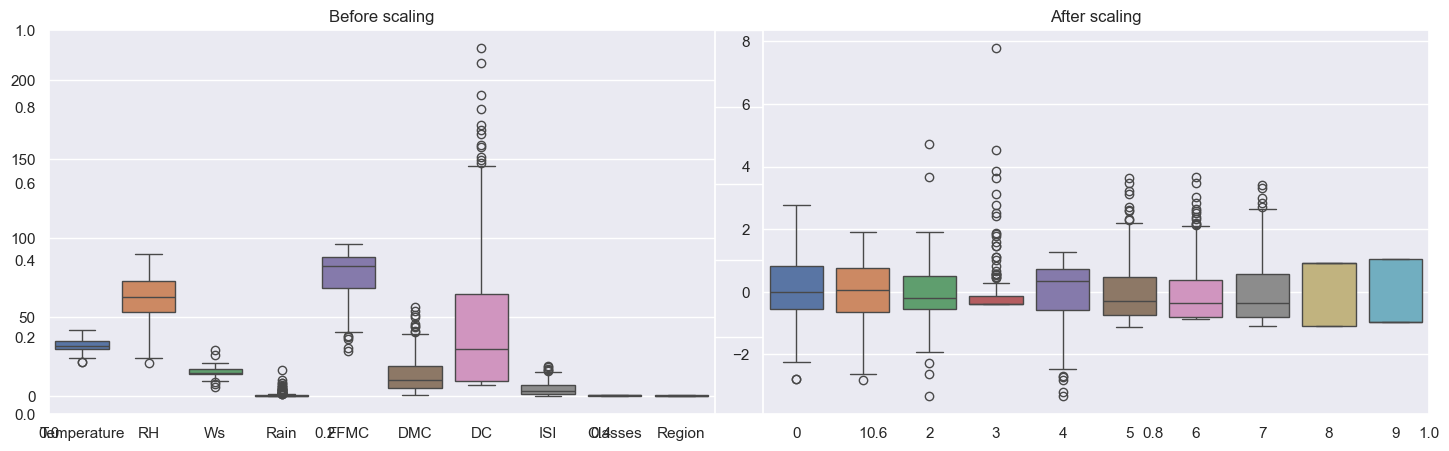

In [34]:
# Plotting
plt.subplots(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title("Before scaling")

plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title("After scaling")

plt.tight_layout()
plt.show()

## Step 9 : Linear Regression Model

In [35]:
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# linear = LinearRegression()
# linear.fit(X_train_scaled,y_train)
# y_pred = linear.predict(X_test_scaled)


# mae = mean_absolute_error(y_test,y_pred)
# mse = mean_squared_error(y_test,y_pred)
# rmse = np.sqrt(mse)
# score = r2_score(y_test,y_pred)
# print(mae)
# print(mse)
# print(rmse)
# print(score)

# plt.scatter(y_test, y_pred)

## Step 10 : Lasso Regression Model

In [36]:
# from sklearn.linear_model import Lasso
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# lasso = Lasso()
# lasso.fit(X_train_scaled,y_train)
# y_pred = lasso.predict(X_test_scaled)


# mae = mean_absolute_error(y_test,y_pred)
# mse = mean_squared_error(y_test,y_pred)
# rmse = np.sqrt(mse)
# score = r2_score(y_test,y_pred)
# print(mae)
# print(mse)
# print(rmse)
# print(score)

# plt.scatter(y_test, y_pred)

## Step 10.1 : Lasso Regression with Cross Validation

In [37]:
# from sklearn.linear_model import LassoCV
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# lassocv = LassoCV(cv=5)
# lassocv.fit(X_train_scaled,y_train)
# y_pred = lassocv.predict(X_test_scaled)


# mae = mean_absolute_error(y_test,y_pred)
# mse = mean_squared_error(y_test,y_pred)
# rmse = np.sqrt(mse)
# score = r2_score(y_test,y_pred)
# print(mae)
# print(mse)
# print(rmse)
# print(score)

# plt.scatter(y_test, y_pred)


## Step 11 : Ridge Regression Model

In [38]:
# from sklearn.linear_model import Ridge
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ridge = Ridge()
# ridge.fit(X_train_scaled,y_train)
# y_pred = ridge.predict(X_test_scaled)


# mae = mean_absolute_error(y_test,y_pred)
# mse = mean_squared_error(y_test,y_pred)
# rmse = np.sqrt(mse)
# score = r2_score(y_test,y_pred)
# print(mae)
# print(mse)
# print(rmse)
# print(score)

# plt.scatter(y_test, y_pred)


## Step 11.1 : Ridge Regression with Cross Validation

In [39]:
# from sklearn.linear_model import RidgeCV
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ridgecv = RidgeCV(cv=5)
# ridgecv.fit(X_train_scaled,y_train)
# y_pred = ridgecv.predict(X_test_scaled)


# mae = mean_absolute_error(y_test,y_pred)
# mse = mean_squared_error(y_test,y_pred)
# rmse = np.sqrt(mse)
# score = r2_score(y_test,y_pred)
# print(mae)
# print(mse)
# print(rmse)
# print(score)

# plt.scatter(y_test, y_pred)

# print(ridgecv.get_params())

## Step 12 : ElasticNet Regression Model

In [40]:
# from sklearn.linear_model import ElasticNet
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# elasticnet = ElasticNet()
# elasticnet.fit(X_train_scaled,y_train)
# y_pred = elasticnet.predict(X_test_scaled)


# mae = mean_absolute_error(y_test,y_pred)
# mse = mean_squared_error(y_test,y_pred)
# rmse = np.sqrt(mse)
# score = r2_score(y_test,y_pred)
# print(mae)
# print(mse)
# print(rmse)
# print(score)

# plt.scatter(y_test, y_pred)

## Step 12.1 : ElasticNet Regression with Cross Validation

0.6708938613719122
1.0864933293905652
1.0423499073682336
0.9809187881702318


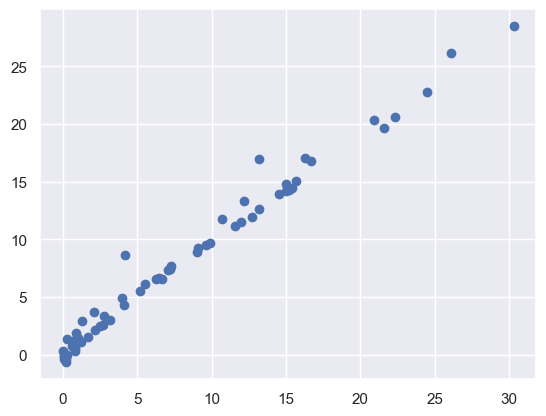

In [41]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

elasticnetcv = ElasticNetCV(cv=5)
elasticnetcv.fit(X_train_scaled,y_train)
y_pred = elasticnetcv.predict(X_test_scaled)


mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
score = r2_score(y_test,y_pred)
print(mae)
print(mse)
print(rmse)
print(score)

plt.scatter(y_test, y_pred)

## Step 13 : Saving the model and Scaler

In [42]:
scaler

StandardScaler()

In [43]:
elasticnetcv 

ElasticNetCV(cv=5)

In [ ]:
import pickle 
pickle.dump(elasticnetcv,open('elasticnetcv.pkl', 'wb')) # downloading the best model
pickle.dump(scaler,open('scaler.pkl', 'wb')) # downloading the corresponding scaler

In [ ]:
model = pickle.load(open('multilinear_regression_model.pkl','rb')) # used to load the model